In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [2]:
train_df = pd.read_csv('H1.csv', dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [3]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
73,2015,27
272,2015,27
303,2015,27
339,2015,27
430,2015,27
529,2015,27
756,2015,27
874,2015,27
1182,2015,27
1279,2015,27


In [4]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

73       201527
272      201527
303      201527
339      201527
430      201527
          ...  
19419    201735
19471    201735
19532    201735
19666    201735
19725    201735
Length: 20000, dtype: object


In [5]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
73,1.0
272,0.0
303,0.0
339,0.0
430,0.0
529,0.0
756,0.0
874,0.0
1182,0.0
1279,1.0


In [6]:
type(df1)

pandas.core.frame.DataFrame

In [7]:
df3=pd.concat([df1, df2], axis = 1).T.drop_duplicates().T
df3
df3.columns = ['FullDate', 'IsCanceled']

In [8]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
272,201527,0
303,201527,0
339,201527,0
430,201527,0
529,201527,0
756,201527,0
874,201527,0
1182,201527,0
2605,201527,0
2741,201527,0


In [9]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,40.0
201528,45.0
201529,79.0
201530,69.0
201531,95.0
201532,62.0
201533,87.0
201534,61.0
201535,78.0


In [10]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     40.0
201528     45.0
201529     79.0
201530     69.0
201531     95.0
          ...  
201731    155.0
201732    127.0
201733    166.0
201734    128.0
201735     91.0
Name: IsCanceled, Length: 115, dtype: float64

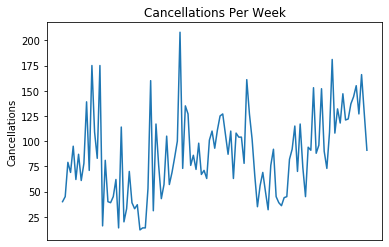

In [11]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Cancellations')
plt.title("Cancellations Per Week")
plt.show()

In [12]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,40.0
201528,45.0
201529,79.0
201530,69.0
201531,95.0
201532,62.0
201533,87.0
201534,61.0
201535,78.0


In [13]:
# Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.14285714],
       [0.16836735],
       [0.34183673],
       [0.29081633],
       [0.42346939],
       [0.25510204],
       [0.38265306],
       [0.25      ],
       [0.33673469],
       [0.64795918],
       [0.30102041],
       [0.83163265],
       [0.49489796],
       [0.3622449 ],
       [0.83163265],
       [0.02040816],
       [0.35204082],
       [0.14285714],
       [0.1377551 ],
       [0.16836735],
       [0.25510204],
       [0.01020408],
       [0.52040816],
       [0.04081633],
       [0.10714286],
       [0.29591837],
       [0.1377551 ],
       [0.10714286],
       [0.12755102],
       [0.        ],
       [0.01020408],
       [0.01020408],
       [0.20918367],
       [0.75510204],
       [0.09693878],
       [0.53571429],
       [0.32653061],
       [0.15816327],
       [0.22959184],
       [0.4744898 ],
       [0.22959184],
       [0.29081633],
       [0.36734694],
       [0.44897959],
       [1.        ],
       [0.31122449],
       [0.62755102],
       [0.586

In [15]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Test data partition
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 2
X_train, Y_train = create_dataset(train, previous)
X_test, Y_test = create_dataset(test, previous)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=150, batch_size=1, verbose=2)

/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/

Train on 89 samples
Epoch 1/150
89/89 - 2s - loss: 0.1069
Epoch 2/150
89/89 - 1s - loss: 0.0585
Epoch 3/150
89/89 - 1s - loss: 0.0403
Epoch 4/150
89/89 - 1s - loss: 0.0366
Epoch 5/150
89/89 - 1s - loss: 0.0358
Epoch 6/150
89/89 - 1s - loss: 0.0355
Epoch 7/150
89/89 - 0s - loss: 0.0353
Epoch 8/150
89/89 - 1s - loss: 0.0350
Epoch 9/150
89/89 - 1s - loss: 0.0348
Epoch 10/150
89/89 - 1s - loss: 0.0349
Epoch 11/150
89/89 - 1s - loss: 0.0347
Epoch 12/150
89/89 - 1s - loss: 0.0346
Epoch 13/150
89/89 - 1s - loss: 0.0345
Epoch 14/150
89/89 - 1s - loss: 0.0342
Epoch 15/150
89/89 - 1s - loss: 0.0343
Epoch 16/150
89/89 - 1s - loss: 0.0342
Epoch 17/150
89/89 - 1s - loss: 0.0340
Epoch 18/150
89/89 - 0s - loss: 0.0343
Epoch 19/150
89/89 - 1s - loss: 0.0340
Epoch 20/150
89/89 - 1s - loss: 0.0340
Epoch 21/150
89/89 - 1s - loss: 0.0338
Epoch 22/150
89/89 - 1s - loss: 0.0338
Epoch 23/150
89/89 - 1s - loss: 0.0341
Epoch 24/150
89/89 - 1s - loss: 0.0336
Epoch 25/150
89/89 - 1s - loss: 0.0335
Epoch 26/150
8

In [16]:
# Generate predictions
trainpred = model.predict(X_train)
testpred = model.predict(X_test)

In [17]:
trainpred

array([[0.24308765],
       [0.29334682],
       [0.34213442],
       [0.34916055],
       [0.36314833],
       [0.33036196],
       [0.34789738],
       [0.3199189 ],
       [0.39131305],
       [0.44606432],
       [0.39403522],
       [0.5183077 ],
       [0.40597185],
       [0.41015097],
       [0.45585287],
       [0.24637128],
       [0.31205457],
       [0.23465568],
       [0.24127944],
       [0.27406478],
       [0.23802526],
       [0.27579623],
       [0.34783858],
       [0.18979341],
       [0.26259083],
       [0.29018098],
       [0.22406907],
       [0.21904297],
       [0.18723628],
       [0.14534493],
       [0.14885393],
       [0.20817131],
       [0.36395976],
       [0.44581863],
       [0.305142  ],
       [0.41373342],
       [0.3066288 ],
       [0.2643258 ],
       [0.33751813],
       [0.37569928],
       [0.30339527],
       [0.33948308],
       [0.3777385 ],
       [0.4346658 ],
       [0.55091023],
       [0.38195285],
       [0.46883935],
       [0.430

In [18]:
testpred

array([[0.3873779 ],
       [0.41535857],
       [0.47876447],
       [0.38130918],
       [0.4220309 ],
       [0.47831023],
       [0.36525652],
       [0.36640295],
       [0.44463843],
       [0.5260266 ],
       [0.432268  ],
       [0.46150354],
       [0.45093915],
       [0.48364857],
       [0.4471804 ],
       [0.45376533],
       [0.47570634],
       [0.48623338],
       [0.4960483 ],
       [0.46590245]], dtype=float32)

In [19]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
testpred = scaler.inverse_transform(testpred)
Y_test = scaler.inverse_transform([Y_test])
predictions = testpred

In [20]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], testpred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 35.26 RMSE
Test Score: 40.75 RMSE


In [21]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [22]:
# Test predictions
testpredPlot = np.empty_like(df)
testpredPlot[:, :] = np.nan
testpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = testpred

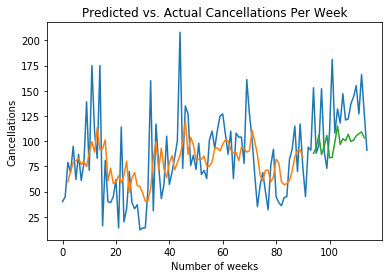

In [23]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
testpred, =plt.plot(testpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.show()

In [24]:
Y_test=Y_test.reshape(-1)
Y_test.shape
Y_test=pd.Series(Y_test)

In [25]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [26]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [27]:
mda(Y_test, predictions)

0.9